### Importing Libraries

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve,plot_precision_recall_curve
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Dataset

In [112]:
# read dataset
dataset = pd.read_csv('data.csv')

In [113]:
# view dataset
dataset.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

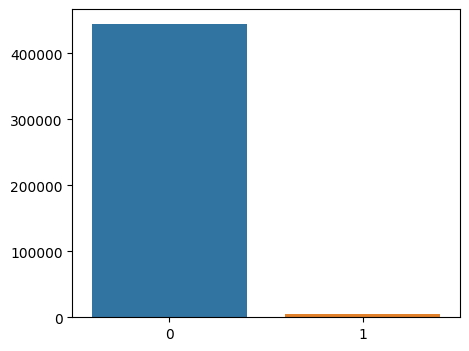

In [115]:
# Class distribution 
plt.figure(figsize=(5,4))
sns.barplot(x=list(dataset['cancelled'].value_counts().keys()), y=list(dataset['cancelled'].value_counts()))
plt.show()

In [116]:
print(f"Ratio of Positive class to negative class: {dataset['cancelled'].value_counts()[1]/dataset['cancelled'].value_counts()[0]}")

Ratio of Positive class to negative class: 0.011731589857503227


In [117]:
# drop columns 
dataset.drop(['pickup_time', 'delivered_time','cancelled_time'],axis=1,inplace=True)
dataset.drop_duplicates(inplace=True)

In [118]:
# find number of null values
dataset.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
dtype: int64

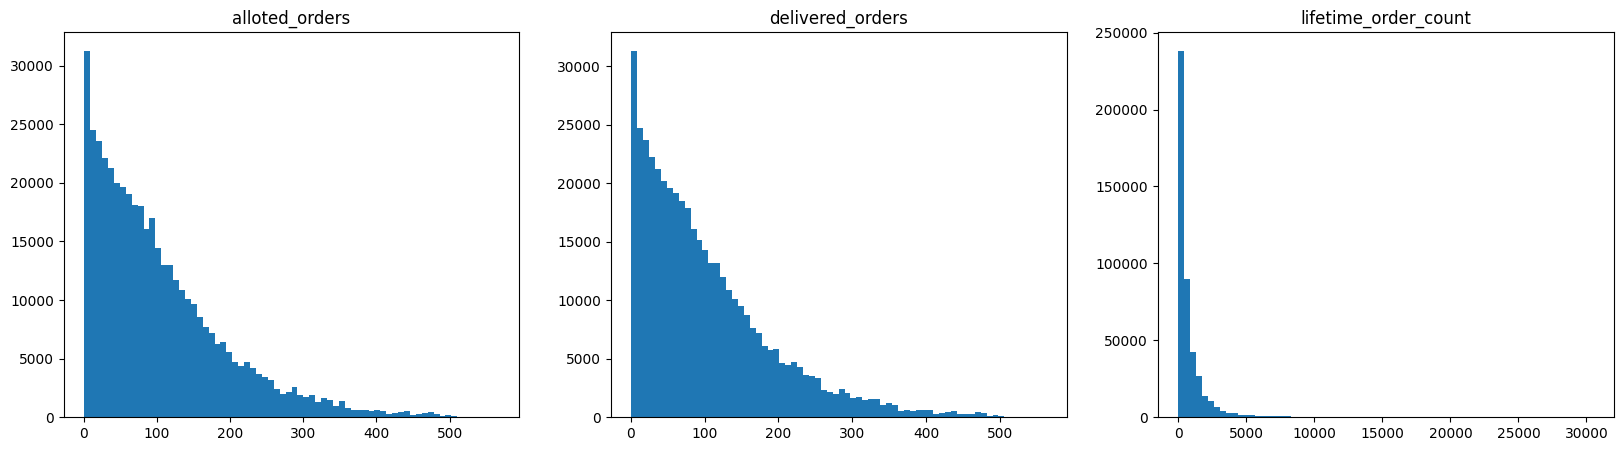

In [119]:
# Histogram plot 
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.hist(dataset['alloted_orders'], bins=70)
plt.title('alloted_orders')
plt.plot()
plt.subplot(1,3,2)
plt.hist(dataset['delivered_orders'], bins=70)
plt.title('delivered_orders')
plt.plot()
plt.subplot(1,3,3)
plt.hist(dataset['lifetime_order_count'], bins=70)
plt.title('lifetime_order_count')
plt.plot()
plt.show()

In [120]:
# fill in null values
dataset['accept_time_NA'] = np.where(dataset['accept_time'].isnull(),1,0)
dataset['alloted_orders_NA'] = np.where(dataset['alloted_orders'].isnull(),1,0)
dataset['delivered_orders_NA'] = np.where(dataset['delivered_orders'].isnull(),1,0)
dataset['undelivered_orders_NA'] = np.where(dataset['undelivered_orders'].isnull(),1,0)
dataset['lifetime_order_count_NA'] = np.where(dataset['lifetime_order_count'].isnull(),1,0)
dataset['reassigned_order'] = np.where(dataset['reassigned_order'].isnull(),0,1)
dataset['session_time_NA'] = np.where(dataset['session_time'].isnull(),1,0)

In [121]:
# fill null values
dataset['reassignment_method'].fillna('none',inplace=True)
dataset['reassignment_reason'].fillna('none',inplace=True)

In [122]:
# view datatypes of each col 
dataset.dtypes

order_time                  object
order_id                     int64
order_date                  object
allot_time                  object
accept_time                 object
rider_id                     int64
first_mile_distance        float64
last_mile_distance         float64
alloted_orders             float64
delivered_orders           float64
cancelled                    int64
undelivered_orders         float64
lifetime_order_count       float64
reassignment_method         object
reassignment_reason         object
reassigned_order             int32
session_time               float64
accept_time_NA               int32
alloted_orders_NA            int32
delivered_orders_NA          int32
undelivered_orders_NA        int32
lifetime_order_count_NA      int32
session_time_NA              int32
dtype: object

In [123]:
# convert cols from object to datetime
date_col = ['order_time','order_date','allot_time','accept_time']
for col in date_col:
    dataset[col] = pd.to_datetime(dataset[col])


# created two new features
# accept delay is the difference between accept time and alot time
dataset['accept_delay'] = ((dataset['accept_time'] - dataset['allot_time']).dt.total_seconds().fillna(-30000)).astype(int)
dataset['allot_delay'] = ((dataset['allot_time'] - dataset['order_time']).dt.total_seconds()).astype(int)

# new column to record the day of the week
dataset['day'] = dataset['order_time'].dt.weekday

# new column with the order time converted to minutes
dataset['minutes'] = 60 * dataset['order_time'].dt.hour + dataset['order_time'].dt.minute

{'Tuesday': 78965, 'Wednesday': 80462, 'Thursday': 80468, 'Friday': 83547, 'Saturday': 49470, 'Sunday': 39254, 'Monday': 37833}


<AxesSubplot: title={'center': 'Day Wise Orders'}>

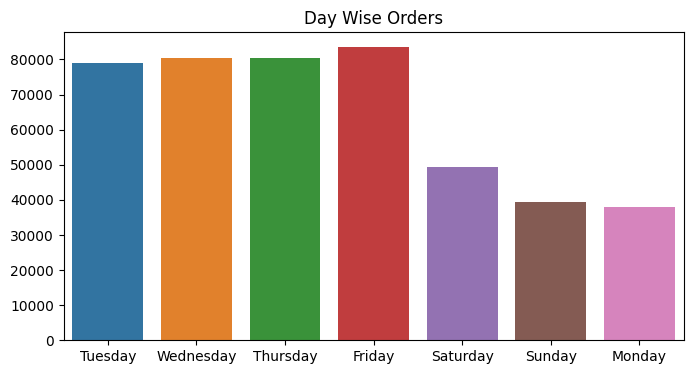

In [124]:
# count the total number of order places on a particular weekday
week = {day:0 for day in range(7)}
start_date = dataset['order_date'].min()
end_date = dataset['order_date'].max()
days_list = [start_date + timedelta(x + 1) for x in range((end_date - start_date).days)]
for day in days_list:
    week[day.weekday()] += 1

order_day = dataset['order_time'].dt.day_name()
orders = {}
for od in order_day:
    try:
        orders[od] += 1
    except:
        orders.setdefault(od,1)

print(orders)

# plot the total number of order against the weekday
plt.figure(figsize=(8,4))
plt.title("Day Wise Orders")
sns.barplot(x=list(orders.keys()), y=list(orders.values()))

In [125]:
#count total normal weekdays and total weekend days
start_date = dataset['order_date'].min()
end_date = dataset['order_date'].max()
daygenerator = [start_date + timedelta(x + 1) for x in range((end_date - start_date).days)]
total_weekdays = sum([1 for day in daygenerator if day.weekday() < 5 and day.weekday() is not 0])
print(total_weekdays)
weekend =  (end_date - start_date).days - total_weekdays

7


[]

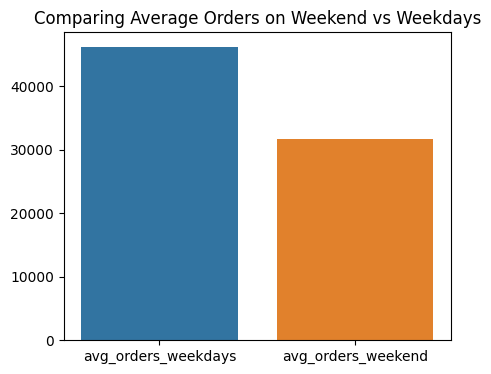

In [126]:
# compare the average order on weekdays vs weekends
week = dataset['order_time'].dt.day_name()
dataset['is_weekend'] = week.apply(lambda x: 1 if (x == 'Saturday' or x=='Sunday' or x=='Monday') else 0)
total_orders_weekend = dataset['is_weekend'].sum()
total_orders_weekdays = dataset.shape[0] - total_orders_weekend
avg_orders_weekdays = total_orders_weekdays/total_weekdays
avg_orders_weekend = total_orders_weekend/weekend

plt.figure(figsize=(5,4))
plt.title("Comparing Average Orders on Weekend vs Weekdays")
sns.barplot(x = ['avg_orders_weekdays', 'avg_orders_weekend'], y = [avg_orders_weekdays, avg_orders_weekend])
plt.plot()

In [127]:
# convert the time into minutes
dataset['morning'] = dataset.apply(lambda x: 1 if (x['minutes']> 360 & x['minutes']<= 720) else 0, axis = 1)
dataset['noon'] = dataset.apply(lambda x: 1 if (x['minutes']>720 & x['minutes']<= 960) else 0, axis = 1)
dataset['evening'] = dataset.apply(lambda x: 1 if (x['minutes']> 960 & x['minutes']<= 1260) else 0, axis = 1)
dataset['aftermidnight'] = dataset.apply(lambda x: 1 if (x['minutes']>1260 | (x['minutes']>=0 & x['minutes']<=360)) else 0, axis = 1)

In [128]:
# replace nan values
dataset['delivered_orders'] = dataset['delivered_orders'].replace(np.nan,0).astype(int)
dataset['undelivered_orders'] = dataset['undelivered_orders'].replace(np.nan,0).astype(int)
dataset['alloted_orders'] = dataset['alloted_orders'].replace(np.nan,0).astype(int)
dataset['order_ratio'] = dataset.apply(lambda x:( x['delivered_orders'] / x['alloted_orders'] )if (x['alloted_orders'] != 0) else 2,axis=1)

In [129]:
dataset.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,...,accept_delay,allot_delay,day,minutes,is_weekend,morning,noon,evening,aftermidnight,order_ratio
count,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449946.000000,449999.000000,...,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000,449999.000000
mean,369143.497970,7763.228961,1.229886,2.968877,100.680717,99.944722,0.011593,0.734719,853.642019,0.030560,...,50.517779,73.188607,2.885240,794.023302,0.281238,0.999624,0.994524,0.988051,0.000004,1.028191
std,131146.753506,5592.877231,0.846181,1.884124,90.637453,90.144309,0.107047,1.056018,1502.977557,0.172123,...,571.587485,274.943375,1.742037,216.618307,0.449604,0.019376,0.073794,0.108656,0.002108,0.195824
min,118350.000000,0.000000,0.000134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-30000.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257343.500000,2805.000000,0.539550,1.470000,31.000000,31.000000,0.000000,0.000000,165.000000,0.000000,...,14.000000,1.000000,1.000000,558.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.989247
50%,369843.000000,6754.000000,1.138700,2.670000,77.000000,77.000000,0.000000,0.000000,396.000000,0.000000,...,37.000000,15.000000,3.000000,866.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,482342.500000,11965.000000,1.853000,4.220000,144.000000,143.000000,0.000000,1.000000,948.000000,0.000000,...,63.000000,48.000000,4.000000,966.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.000000,...,930.000000,32334.000000,6.000000,1301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [130]:
# check sum of num values
dataset.isna().sum()

order_time                    0
order_id                      0
order_date                    0
allot_time                    0
accept_time                 157
rider_id                      0
first_mile_distance           0
last_mile_distance            0
alloted_orders                0
delivered_orders              0
cancelled                     0
undelivered_orders            0
lifetime_order_count         53
reassignment_method           0
reassignment_reason           0
reassigned_order              0
session_time               3675
accept_time_NA                0
alloted_orders_NA             0
delivered_orders_NA           0
undelivered_orders_NA         0
lifetime_order_count_NA       0
session_time_NA               0
accept_delay                  0
allot_delay                   0
day                           0
minutes                       0
is_weekend                    0
morning                       0
noon                          0
evening                       0
aftermid

In [131]:
# label encode the categorical data
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

dataset['reassignment_method'] = le1.fit_transform(dataset['reassignment_method'])
dataset['reassignment_reason'] = le2.fit_transform(dataset['reassignment_reason'])

In [132]:
# fill null values
for df in [dataset]:
    df['session_time'].fillna(-20, inplace=True)
    df['lifetime_order_count'].fillna(-20, inplace=True)

In [133]:
# sepearte numeric cols and categorical cols
numeric_cols = [   
'rider_id',                       
'first_mile_distance','last_mile_distance','lifetime_order_count',           
'alloted_orders','delivered_orders', 'minutes',  'undelivered_orders',             
'session_time','accept_delay','allot_delay','order_ratio'
]

categorical_cols = [
'rider_id',                                            
'reassignment_method','reassignment_reason','day', 'accept_time_NA',
'alloted_orders_NA', 'delivered_orders_NA', 'undelivered_orders_NA',
'lifetime_order_count_NA', 'session_time_NA','morning', 'noon', 'evening','aftermidnight','is_weekend'
]

numeric_dataset = dataset[numeric_cols]
categorical = dataset[categorical_cols]

In [134]:
# groupby by rider id, calculate count, mean, max, min, sum for rider id
agg = numeric_dataset.groupby('rider_id').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

agg_idx = ['count', 'mean', 'max', 'min', 'sum']
num_agg_cols = ['rider_id']
for col in numeric_cols:
    if col is not 'rider_id':
        for agi in agg_idx:
            num_agg_cols.append(col + '_' + agi)

agg.columns = num_agg_cols
dataset = dataset.merge(agg,how = 'left', on = 'rider_id')

In [135]:
# groupby by rider id, calculate sum, mean
cat = categorical.groupby('rider_id').agg(['sum', 'mean']).reset_index()

agg_idx = ['sum', 'mean']
cat_agg_cols = ['rider_id']
for col in categorical_cols:
    if col is not 'rider_id':
        for agi in agg_idx:
            cat_agg_cols.append(col + '_' + agi)

cat.columns = cat_agg_cols
dataset = dataset.merge(cat,how = 'left', on = 'rider_id')

In [136]:
# drop cols from dataset
dataset.drop(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'rider_id',],axis=1,inplace=True)

In [137]:
# split data into train and test
X = dataset.drop('cancelled',axis=1)
y = dataset['cancelled']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.05,stratify=y)

In [138]:
print(X.shape)
print(X_train.shape)

(449999, 109)
(427499, 109)


In [139]:
# function to evaluate the model performance
def model_evaluation(model,X_test,y_test):
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model, X_test,y_test)
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test,y_pred))
    from sklearn.metrics import f1_score
    print(f"f1 score for model {model} = {f1_score(y_pred=y_pred, y_true= y_test)}")

#### Training and Evaluating the models:


Accuracy: 0.9883111111111111
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.46      0.04      0.08       261

    accuracy                           0.99     22500
   macro avg       0.72      0.52      0.54     22500
weighted avg       0.98      0.99      0.98     22500

f1 score for model LogisticRegression(random_state=42) = 0.07719298245614037


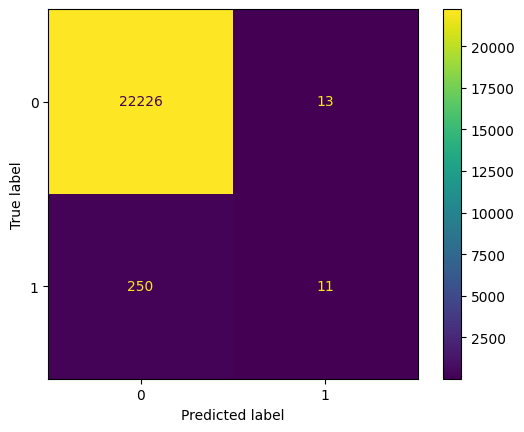

In [140]:
# train logistic regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_train, y_train)
model_evaluation(model_1,X_test,y_test)


Accuracy: 0.9893333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.68      0.15      0.25       261

    accuracy                           0.99     22500
   macro avg       0.84      0.57      0.62     22500
weighted avg       0.99      0.99      0.99     22500

f1 score for model RandomForestClassifier(criterion='entropy', random_state=42) = 0.24528301886792456


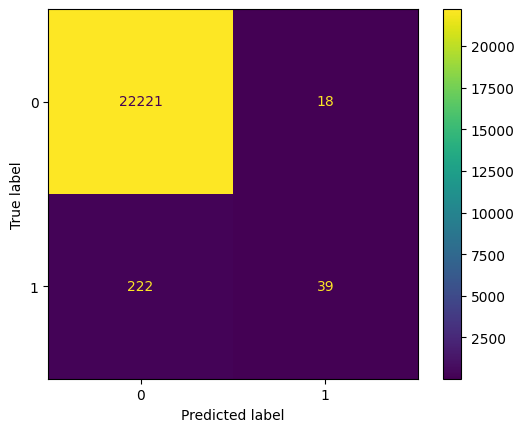

In [141]:
# Train random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state=42,criterion='entropy')
model_2.fit(X_train, y_train)
model_evaluation(model_2,X_test,y_test)

#### Under sampling

In [142]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
Ras = RandomUnderSampler()
X_under, y_under = Ras.fit_resample(X_train,y_train)
print('Original dataset shape', Counter(y_train))
print('Undersample dataset shape', Counter(y_under))

Original dataset shape Counter({0: 422543, 1: 4956})
Undersample dataset shape Counter({0: 4956, 1: 4956})



Accuracy: 0.7262222222222222
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     22239
           1       0.03      0.68      0.05       261

    accuracy                           0.73     22500
   macro avg       0.51      0.70      0.45     22500
weighted avg       0.98      0.73      0.83     22500

f1 score for model LogisticRegression(random_state=42) = 0.05463474524248005


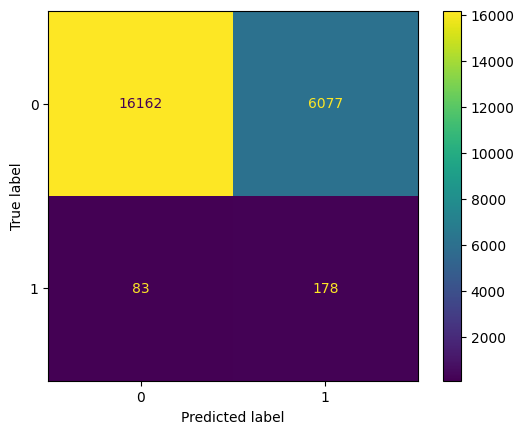

In [143]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_under, y_under)
model_evaluation(model_3,X_test,y_test)


Accuracy: 0.7978666666666666
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     22239
           1       0.05      0.82      0.09       261

    accuracy                           0.80     22500
   macro avg       0.52      0.81      0.49     22500
weighted avg       0.99      0.80      0.88     22500

f1 score for model RandomForestClassifier(criterion='entropy', random_state=42) = 0.0860128617363344


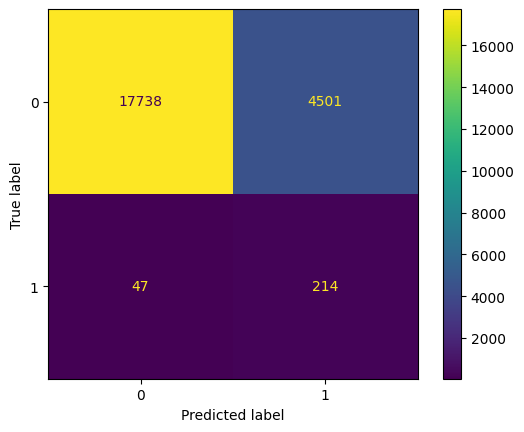

In [144]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(random_state=42,criterion='entropy')
model_4.fit(X_under, y_under)
model_evaluation(model_4,X_test,y_test)

#### Over sampling

In [145]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_over, y_over = smt.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('oversampling dataset shape', Counter(y_over))

Original dataset shape Counter({0: 422543, 1: 4956})
oversampling dataset shape Counter({0: 422543, 1: 422543})



Accuracy: 0.7120888888888889
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     22239
           1       0.03      0.68      0.05       261

    accuracy                           0.71     22500
   macro avg       0.51      0.70      0.44     22500
weighted avg       0.98      0.71      0.82     22500

f1 score for model LogisticRegression(random_state=42) = 0.052092478782557794


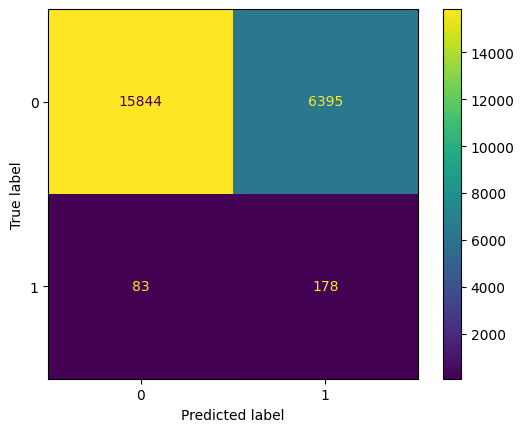

In [146]:
from sklearn.linear_model import LogisticRegression
model_5 = LogisticRegression(random_state=42)
model_5.fit(X_over, y_over)
model_evaluation(model_5,X_test,y_test)


Accuracy: 0.9880888888888889
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.47      0.20      0.28       261

    accuracy                           0.99     22500
   macro avg       0.73      0.60      0.63     22500
weighted avg       0.98      0.99      0.99     22500

f1 score for model RandomForestClassifier(criterion='entropy', random_state=42) = 0.2756756756756757


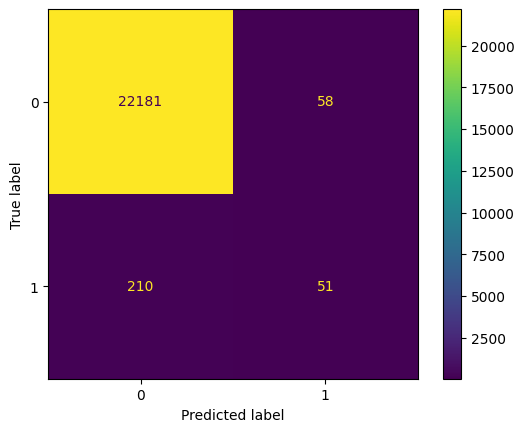

In [147]:
from sklearn.ensemble import RandomForestClassifier
model_6 = RandomForestClassifier(random_state=42,criterion='entropy')
model_6.fit(X_over, y_over)
model_evaluation(model_6,X_test,y_test)

#### Xgboost classifier


Accuracy: 0.9896888888888888
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22239
           1       0.67      0.21      0.33       261

    accuracy                           0.99     22500
   macro avg       0.83      0.61      0.66     22500
weighted avg       0.99      0.99      0.99     22500

f1 score for model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predi

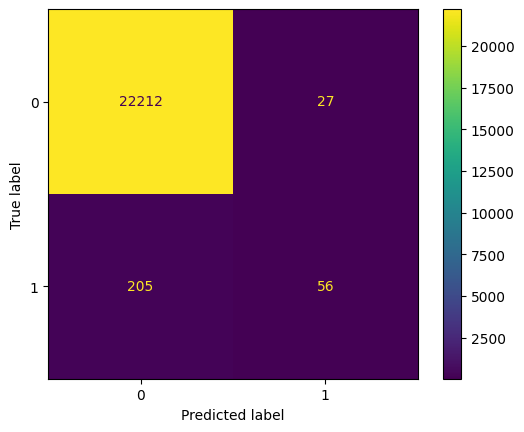

In [148]:

from xgboost import XGBClassifier
model_7 = XGBClassifier(random_state = 42)
model_7.fit(X_train, y_train)
model_evaluation(model_7,X_test,y_test)

### Conclusion: 
#### The best model comes out to be XGBoost classifier with f1 score = 0.325